In [1]:
import random
  # define rooms and items

master_bedroom = {
    "name": "master bedroom",
    "type": "room",
}

king_bed = {
    "name": "king bed",
    "type": "furniture",
}

bedroom_door = {
    "name": "bedroom door",
    "type": "door",
}

bedroom_key = {
    "name": "key for bedroom door",
    "type": "key",
    "target": bedroom_door,
}

wardrobe = {
    "name": "wardrobe",
    "type": "furniture",
}

dining_room = {
    "name": "dining room",
    "type": "room",
}

dining_table = {
    "name": "dining table",
    "type": "furniture",
}

kitchen_door = {
    "name": "kitchen door",
    "type": "door",
}

main_door = {
    "name": "main door",
    "type": "door",
}

kitchen_key = {
    "name": "key for kitchen door",
    "type": "key",
    "target": kitchen_door,
}

kitchen = {
    "name": "kitchen",
    "type": "room",
}

refrigerator = {
    "name": "refrigerator",
    "type": "furniture",
}

main_door_key = {
    "name": "key for main door",
    "type": "key",
    "target": main_door,
}

cupboard = {
    "name": "cupboard",
    "type": "furniture",
}

gardens = {
    "name": "gardens",
    "type": "room",
}
car = {
    "name": "car",
    "type": "furniture",
}

garden_gate = {
    "name": "garden gate",
    "type": "door",
}

garden_gate_key = {
    "name": "key for garden gate",
    "type": "key",
    "target": garden_gate,
}

street = {
  "name": "street"
}

all_rooms = [master_bedroom, dining_room, kitchen, gardens,  street]

all_doors = [bedroom_door, kitchen_door, main_door, garden_gate]

# define which items/rooms are related

object_relations = {
    "master bedroom": [king_bed, wardrobe, bedroom_door],
    "wardrobe": [bedroom_key],
    "bedroom door": [master_bedroom, dining_room],
    "dining room": [dining_table, bedroom_door, kitchen_door, main_door],
    "dining table": [kitchen_key],
    "kitchen door": [dining_room, kitchen],
    "kitchen": [refrigerator, cupboard, kitchen_door],
    "refrigerator": [main_door_key],
    "main door": [dining_room, gardens],
    "cupboard": [garden_gate_key],
    "garden gate": [gardens, street],
    "gardens": [car, main_door, garden_gate],
    "street": [garden_gate]

}

# define game state. Do not directly change this dict.
# Instead, when a new game starts, make a copy of this
# dict and use the copy to store gameplay state. This
# way you can replay the game multiple times.

INIT_GAME_STATE = {
    "current_room": master_bedroom,
    "keys_collected": [],
    "target_room": street
}

In [2]:
from IPython.display import Image, display

def show_image():
    display(Image("https://img.freepik.com/fotos-premium/mansion-victoriana-embrujada-envuelta-niebla-arte-gotico_665782-1381.jpg"))

def linebreak():
    """
    Print a line break
    """
    print("\n\n")

def start_game():
    """
    Start the game
    """
    linebreak()
    show_image()
    print("""
    \n

    A fierce storm surprises you in a winter night and as you walk through an unfamiliar neighborhood.
    Seeking shelter, you find an apparently abandoned house with the door open and a light on.
    You quickly enter, but the door slams shut and locks. Suddenly, a bolt of lightning causes a power outage,
    leaving you in total darkness. The last thing you remember is waking up on a master bed of a room, and you ponder
    What should i do?


    Suddenly, you find yourself waking up on an unfamiliar bed, in an eerie house devoid of windows.
    Your memory fails to provide any explanation about how you ended up here, or what transpired previously.
    You can sense an imminent threat lurking somewhere - your gut tells you to escape the house immediately!\n
    \n
    You look around and realize you’re in a master bedroom.\n
    \n
    “What should I do?” you ponder.\n
    \n
""")

    play_room(game_state["current_room"])

def play_room(room):
    """
    Play a room. First check if the room being played is the target room.
    If it is, the game will end with success. Otherwise, let player either
    explore (list all items in this room) or examine an item found here.
    """
    game_state["current_room"] = room
    if(game_state["current_room"] == game_state["target_room"]):
        print("When you try to escape a ghost appears. You will have to beat it in a rock/paper/scissors game to get freedom")
        rock_paper_scissors()
        #print("Congrats! You escaped the room!")
    else:
        print("You are now in " + room["name"])
        intended_action = input("What would you like to do? Type 'explore' or 'examine'?").strip()
        if intended_action == "explore":
            explore_room(room)
            play_room(room)
        elif intended_action == "examine":
            examine_item(input("What would you like to examine?").strip())
        else:
            print("Not sure what you mean. Type 'explore' or 'examine'.")
            play_room(room)
        linebreak()

def explore_room(room):
    """
    Explore a room. List all items belonging to this room.
    """
    items = [i["name"] for i in object_relations[room["name"]]]
    print("You explore the room. This is " + room["name"] + ". You find " + ", ".join(items))

def get_next_room_of_door(door, current_room):
    """
    From object_relations, find the two rooms connected to the given door.
    Return the room that is not the current_room.
    """
    connected_rooms = object_relations[door["name"]]
    for room in connected_rooms:
        if(not current_room == room):
            return room

def examine_item(item_name):
    """
    Examine an item which can be a door or furniture.
    First make sure the intended item belongs to the current room.
    Then check if the item is a door. Tell player if key hasn't been
    collected yet. Otherwise ask player if they want to go to the next
    room. If the item is not a door, then check if it contains keys.
    Collect the key if found and update the game state. At the end,
    play either the current or the next room depending on the game state
    to keep playing.
    """
    current_room = game_state["current_room"]
    next_room = ""
    output = None

    for item in object_relations[current_room["name"]]:
        if(item["name"] == item_name):
            output = "You examine " + item_name + ". "
            if(item["type"] == "door"):
                have_key = False
                for key in game_state["keys_collected"]:
                    if(key["target"] == item):
                        have_key = True
                if(have_key):
                    output += "You unlock it with a key you have."
                    next_room = get_next_room_of_door(item, current_room)
                else:
                    output += "It is locked but you don't have the key."
            else:
                if(item["name"] in object_relations and len(object_relations[item["name"]])>0):
                    item_found = object_relations[item["name"]].pop()
                    game_state["keys_collected"].append(item_found)
                    output += "You find " + item_found["name"] + "."
                else:
                    output += "There isn't anything interesting about it."
            print(output)
            break

    if(output is None):
        print("The item you requested is not found in the current room.")

    if(next_room and input("Do you want to go to the next room? Enter 'yes' or 'no'").strip() == 'yes'):
        play_room(next_room)
    else:
        play_room(current_room)

def rock_paper_scissors():
  options = ["rock", "paper", "scissors"]
  repeat = True
  player_2_name = "ghost"
  wins_player_1 = 0
  wins_player_2 = 0

  while repeat == True:
    while True:
        player_1 = input("Please enter your choice (rock/paper/scissors): ").lower()
        if player_1 in options:
            break
        else:
            print("Please enter a valid value")

    player_2 = options[random.randint(0,2)]

    if player_1 == player_2:
      print("It's a draw!")
    elif (player_1.lower() == "rock" and player_2.lower() == "scissors") or (player_1.lower() == "paper" and player_2.lower() == "rock") or (player_1.lower() == "scissors" and player_2.lower() == "paper"):
        print("You win!")
        print("Congrats! You managed to escape the Haunted Mansion!")
        return
    else:
        print(f"{player_2_name} wins!")

    while True:
      choice = input("Do you want to play again?(yes/no): ").lower()
      if choice in ["yes", "no"]:
        break
      else:
        print("Please enter a valid value")
    if choice == "no":
        print("Game Over")
        repeat = False
        return

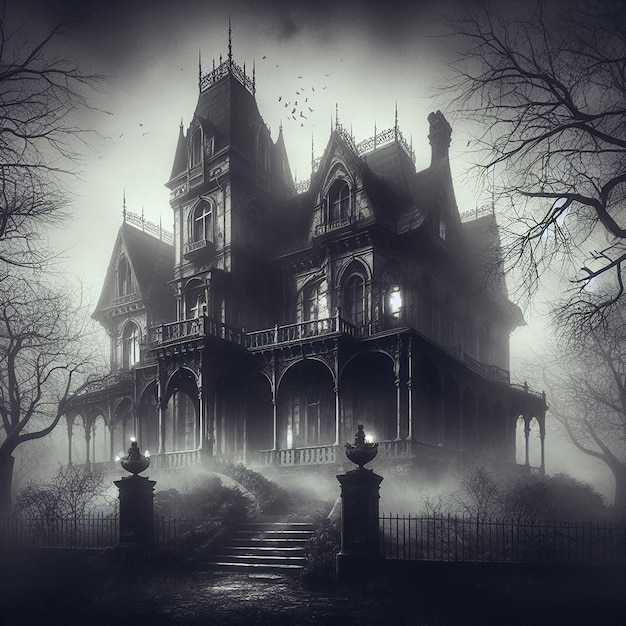


    


    A fierce storm surprises you in a winter night and as you walk through an unfamiliar neighborhood.
    Seeking shelter, you find an apparently abandoned house with the door open and a light on.
    You quickly enter, but the door slams shut and locks. Suddenly, a bolt of lightning causes a power outage,
    leaving you in total darkness. The last thing you remember is waking up on a master bed of a room, and you ponder
    What should i do?


    Suddenly, you find yourself waking up on an unfamiliar bed, in an eerie house devoid of windows.
    Your memory fails to provide any explanation about how you ended up here, or what transpired previously.
    You can sense an imminent threat lurking somewhere - your gut tells you to escape the house immediately!

    

    You look around and realize you’re in a master bedroom.

    

    “What should I do?” you ponder.

    


You are now in master bedroom
You explore the room. This is master bedroom. You find king bed, wardrobe,

In [ ]:
game_state = INIT_GAME_STATE.copy()

start_game()